In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from math import e
from factors import *
import numpy as np

Q1

In [34]:
d=pd.read_excel(r"C:\Users\Notebook\Desktop\EEcon\data.xlsx")
d.head()

,Years,Salary,material 1,material 2,demand,price
0,1990,39343.0,200.000000,89.600000,103,1200.0
1,1991,46205.0,212.000000,92.662500,104,1375.0
2,1992,37731.0,224.720000,95.807250,101,1451.0
3,1993,43525.0,238.203200,99.034819,99,1593.0
4,1994,39891.0,252.495392,102.345626,95,1718.5


In [35]:
d=d.ffill()
d.head()

,Years,Salary,material 1,material 2,demand,price
0,1990,39343.0,200.000000,89.600000,103,1200.0
1,1991,46205.0,212.000000,92.662500,104,1375.0
2,1992,37731.0,224.720000,95.807250,101,1451.0
3,1993,43525.0,238.203200,99.034819,99,1593.0
4,1994,39891.0,252.495392,102.345626,95,1718.5


Q2

In [36]:
X,Y=d['Years'].values,d['Salary'].values
X,Y=X.reshape(-1,1),Y.reshape(-1,1)

In [37]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X,Y)
print('Score=',lr.score(X,Y))

Score= 0.9288722371152188


Q3

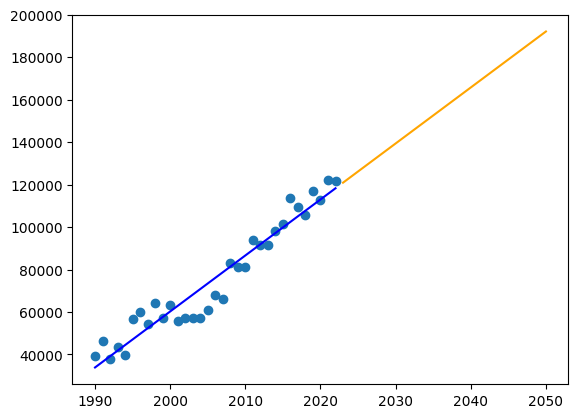

In [38]:
x1=np.arange(1990,2023).reshape(-1,1)
x2=np.arange(2023,2051).reshape(-1,1)
y1=lr.predict(x1)
y2=lr.predict(x2)
plt.plot(x1,y1,c='blue')
plt.plot(x2,y2,c='orange')
plt.scatter(d['Years'],d['Salary'])

In [39]:
df=pd.DataFrame({
    'Year' : [i for i in range(2023,2051)]
})
years=df['Year'].values.reshape(-1,1)
salaries=lr.predict(years)
df['Salary'] = salaries
df.head()

,Year,Salary
0,2023,120929.164773
1,2024,123568.227941
2,2025,126207.291110
3,2026,128846.354278
4,2027,131485.417447


Q4

In [40]:
first=d['material 1'].values[-1]
array=np.ones(28)
for i in range(1,29):
    array[i-1] = p_to_f(first,0.06,i)
array

array([1368.11797656, 1450.20505515, 1537.21735846, 1629.45039997,
       1727.21742397, 1830.85046941, 1940.70149757, 2057.14358743,
       2180.57220267, 2311.40653483, 2450.09092692, 2597.09638254,
       2752.92216549, 2918.09749542, 3093.18334514, 3278.77434585,
       3475.5008066 , 3684.030855  , 3905.0727063 , 4139.37706868,
       4387.7396928 , 4651.00407436, 4930.06431883, 5225.86817796,
       5539.42026863, 5871.78548475, 6224.09261384, 6597.53817067])

In [41]:
df['Material 1'] = array
df.head()

,Year,Salary,Material 1
0,2023,120929.164773,1368.117977
1,2024,123568.227941,1450.205055
2,2025,126207.291110,1537.217358
3,2026,128846.354278,1629.450400
4,2027,131485.417447,1727.217424


Q5

In [42]:
array=np.ones_like(d['material 2'].values)

for i in range(len(array)):
    array[i] = f_to_p(d['material 2'][i],0.05,i)
array

array([89.6 , 88.25, 86.9 , 85.55, 84.2 , 82.85, 81.5 , 80.15, 78.8 ,
       77.45, 76.1 , 74.75, 73.4 , 72.05, 70.7 , 69.35, 68.  , 66.65,
       65.3 , 63.95, 62.6 , 61.25, 59.9 , 58.55, 57.2 , 55.85, 54.5 ,
       53.15, 51.8 , 50.45, 49.1 , 47.75, 46.4 ])

In [43]:
X=d["Years"].values.reshape(-1,1)
Y=array.reshape(-1,1)
model = LinearRegression()
model.fit(X,Y)
score = model.score(X,Y)
score

1.0

Q6

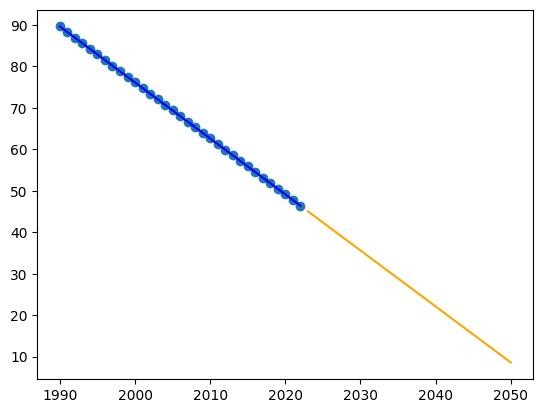

In [44]:
x1=np.arange(1990,2023).reshape(-1,1)
x2=np.arange(2023,2051).reshape(-1,1)
y1=model.predict(x1)
y2=model.predict(x2)
plt.plot(x1,y1,c='blue')
plt.plot(x2,y2,c='orange')
plt.scatter(d['Years'],array)

In [45]:
prices=model.predict(years)
for i in range(len(prices)):
    prices[i] = p_to_f(prices[i],0.05,i+33)
df['material 2'] = prices
df.head()

,Year,Salary,Material 1,material 2
0,2023,120929.164773,1368.117977,225.393644
1,2024,123568.227941,1450.205055,229.571306
2,2025,126207.291110,1537.217358,233.603251
3,2026,128846.354278,1629.450400,237.464462
4,2027,131485.417447,1727.217424,241.127785


Q7

In [46]:
output=[]
year = []
for i in range(1990,2023):
    output.append(e**(-i/50))

for i in range(2023,2051):
    year.append(e**(-i/50))

demand = list(d['demand'])

Q8

In [47]:
X = np.array(output).reshape(-1, 1)
Y = np.array(demand).reshape(-1, 1)

In [48]:
model = LinearRegression()
model.fit(X, Y)
score = model.score(X,Y)
score

0.9849573838479749

Q9

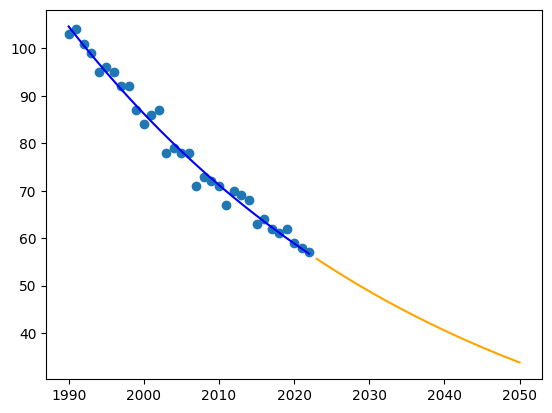

In [49]:
x1=np.arange(1990,2023).reshape(-1,1)
x2=np.arange(2023,2051).reshape(-1,1)
output=np.array(output).reshape(-1, 1)
year=np.array(year).reshape(-1, 1)
y1=model.predict(output)
y2=model.predict(year)
plt.plot(x1,y1,c='blue')
plt.plot(x2,y2,c='orange')
plt.scatter(d['Years'],d['demand'])

In [50]:
demands=[d[0] for d in y2]
df['demand'] = demands
df.head()

,Year,Salary,Material 1,material 2,demand
0,2023,120929.164773,1368.117977,225.393644,55.655541
1,2024,123568.227941,1450.205055,229.571306,54.618177
2,2025,126207.291110,1537.217358,233.603251,53.601354
3,2026,128846.354278,1629.450400,237.464462,52.604666
4,2027,131485.417447,1727.217424,241.127785,51.627714


Q10

In [51]:
train_x = d[['Years']]
train_y = d[['price']]
regr = LinearRegression().fit(train_x, train_y)
print('Score=',regr.score(train_x,train_y))

Score= 0.9999653378861689


Q11

c:\Users\Notebook\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Notebook\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


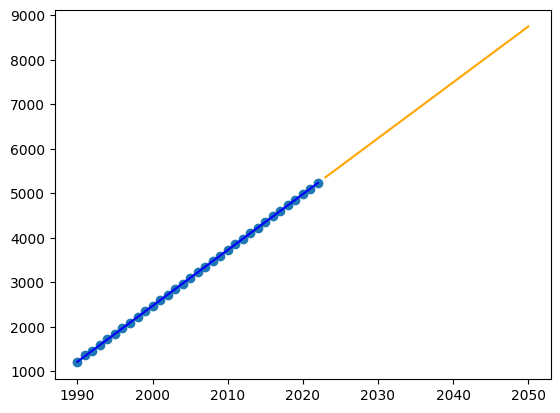

In [52]:
x1=np.arange(1990,2023).reshape(-1,1)
x2=np.arange(2023,2051).reshape(-1,1)
y1=regr.predict(x1)
y2=regr.predict(x2)
plt.plot(x1,y1,c='blue')
plt.plot(x2,y2,c='orange')
plt.scatter(d['Years'],d['price'])

In [53]:
prices=regr.predict(years)
df['prices'] = prices
print(df.shape)
df.head()

(28, 6)


c:\Users\Notebook\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,Year,Salary,Material 1,material 2,demand,prices
0,2023,120929.164773,1368.117977,225.393644,55.655541,5358.0
1,2024,123568.227941,1450.205055,229.571306,54.618177,5483.5
2,2025,126207.291110,1537.217358,233.603251,53.601354,5609.0
3,2026,128846.354278,1629.450400,237.464462,52.604666,5734.5
4,2027,131485.417447,1727.217424,241.127785,51.627714,5860.0


In [54]:
conditions = [
    (df['demand'] > 60),
    ((df['demand'] < 60) & (df['demand'] > 40)),
    ((df['demand'] > 20) & (df['demand'] < 40)),
    (df['demand'] <= 20)
]

values = [
    df['material 2'] * (1 - 0.18),
    df['material 2'] * (1 - 0.10),
    df['material 2'] * (1 - 0.05),
   df['material 2']
]

df['material 2 (new)'] = np.select(conditions, values, default='')

df.head()

,Year,Salary,Material 1,material 2,demand,prices,material 2 (new)
0,2023,120929.164773,1368.117977,225.393644,55.655541,5358.0,202.85427943675884
1,2024,123568.227941,1450.205055,229.571306,54.618177,5483.5,206.61417562609765
2,2025,126207.291110,1537.217358,233.603251,53.601354,5609.0,210.2429257357784
3,2026,128846.354278,1629.450400,237.464462,52.604666,5734.5,213.71801541736198
4,2027,131485.417447,1727.217424,241.127785,51.627714,5860.0,217.015006752762


In [55]:
revenue = np.array(df['demand']) * np.array(df['prices'])
df['material 2 (new)'] = pd.to_numeric(df['material 2 (new)'], errors='coerce')

In [56]:
costs = np.array(df['demand'])*np.array(df['Material 1']) + np.array(df['Salary'])
costs = costs + np.array(df['demand'])*np.array(df['material 2 (new)'])

profit = revenue - costs

df['profit'] = profit

In [57]:
columns = ['Year', 'profit']
df_profit = pd.DataFrame(df, columns=columns)

<p align="right">خواسته اول<p>

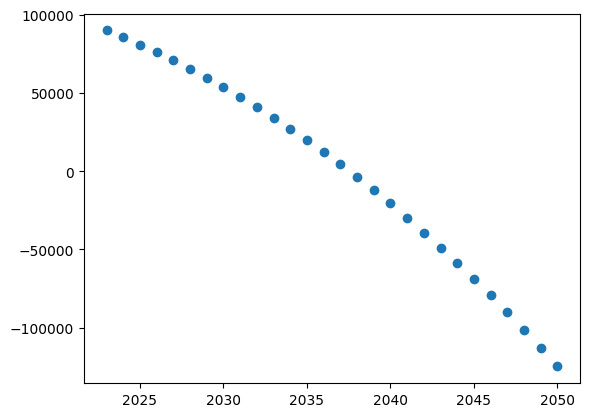

In [58]:
plt.scatter(df_profit['Year'], df_profit['profit'])

In [59]:
np.argmax(df_profit['profit'] < 0) + df_profit['Year'].min()-1

2037

<p align="right">خواسته دوم<p>

In [60]:
df_2022_2032 = df_profit[df_profit['Year'] <= 2032]
df_2022_2032

,Year,profit
0,2023,89839.911904
1,2024,85438.099136
2,2025,80776.467091
3,2026,75855.844175
4,2027,70676.709105
5,2028,65239.186470
6,2029,59543.041797
7,2030,53587.676090
8,2031,47372.119849
9,2032,40895.026531


In [61]:
df_2022_2032['stakeholder_share'] = df_2022_2032['profit'] * 0.25
df_2022_2032['annual_saving'] = df_2022_2032['stakeholder_share'] * 0.20
annual_saving = df_2022_2032['annual_saving'].values
annual_saving

C:\Users\Notebook\AppData\Local\Temp\ipykernel_4800\3096674057.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022_2032['stakeholder_share'] = df_2022_2032['profit'] * 0.25
C:\Users\Notebook\AppData\Local\Temp\ipykernel_4800\3096674057.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022_2032['annual_saving'] = df_2022_2032['stakeholder_share'] * 0.20


array([4491.99559522, 4271.90495681, 4038.82335457, 3792.79220875,
       3533.83545523, 3261.95932352, 2977.15208985, 2679.38380448,
       2368.60599243, 2044.75132654])

In [62]:
fv_savings = []
years = df_2022_2032['Year'].values
for year, saving in zip(years, df_2022_2032['annual_saving'].values):
    n = 2032 - year
    fv = p_to_f(saving, 0.05, n)
    fv_savings.append(fv)
fv_savings

[6968.559512915937,
 6311.549233786809,
 5683.030049247229,
 5082.704304737829,
 4510.16903641658,
 3964.9319449866157,
 3446.425688011053,
 2954.02064444036,
 2487.036292054775,
 2044.7513265429764]

In [63]:
total_fv_savings = np.sum(fv_savings)
m = len(years)
fixed_annual_investment = PMT(total_fv_savings, 0.05, m)
fixed_annual_investment

3454.7264504231252

<p align="right">خواسته سوم<p>

In [64]:
cash_flow = df_profit['profit'].tolist()
npv = 0
for i in range(len(cash_flow)):
       npv=npv+ f_to_p(cash_flow[i],0.05, i+1)
print(npv-250000)

93586.99202452693
